# Дополнительное задание:
Вы справились с исследованием данных! Ваша стажировка продолжается, в мире произошли непредвиденные события — пандемия COVID-19. Вам доверена срочная задача. Чтобы сформировать понимание о стратегии компании, необходимо определить возможные сценарии дальнейшего развития событий.

In [123]:
import numpy as np # Numerical Python
import pandas as pd # работа с данными
import matplotlib.pyplot as plt # визуализация
import seaborn as sns
from scipy import stats # статистика

from sklearn.linear_model import LinearRegression

### 11	Загрузите файл dip_hw_covid.csv в pandas dataframe

Датасет содержит информацию о распространении COVID-19 в России и США:

In [124]:
my_path = r'data/dip_hw_covid.csv'
df = pd.read_csv(my_path)
df.head()

,date,country,confirmed,deaths
0,2020-01-22 00:00:00,Russia,0.0,0.0
1,2020-01-22 00:00:00,US,1.0,0.0
2,2020-01-23 00:00:00,Russia,0.0,0.0
3,2020-01-23 00:00:00,US,1.0,0.0
4,2020-01-24 00:00:00,Russia,0.0,0.0


Значение столбцов:

- date — дата фиксации значений;
- country — страна;
- confirmed — заражений зафиксировано;
- deaths — смертей зафиксировано.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1116 non-null   object 
 1   country    1116 non-null   object 
 2   confirmed  1116 non-null   float64
 3   deaths     1116 non-null   float64
dtypes: float64(2), object(2)
memory usage: 35.1+ KB


In [126]:
df.describe()

,confirmed,deaths
count,1.116000e+03,1116.000000
mean,8.508892e+06,169543.963262
std,1.130533e+07,198133.420131
min,0.000000e+00,0.000000
25%,8.245898e+05,15199.000000
50%,3.840895e+06,98314.000000
75%,8.748694e+06,226763.000000
max,3.500342e+07,613228.000000


In [127]:
df['country'].value_counts()

country
Russia    558
US        558
Name: count, dtype: int64

Данные без пропусков, количество записаей одинаково для России и США. 

Количество зафиксированных заражений от 0 до 35 003 420 в день.

Количество смертей от 0 до 613 228 в день.

### 12	Исследуйте данные: 
      1. Рассчитайте коэффициент корреляции между заболеваемостью и смертностью; 
      2. Визуализируйте динамики заболеваемости и смертности по доступным странам в отдельности, сравните характер распространения	

1. Для оценки зависимости между количеством заболеваемости и количеством семертей рассчитаем коэффициент корреляции Пирсона. Он измеряет линейную связь между двумя переменными и принимает значения от -1 до 1, где:
- 1 означает идеальную положительную линейную связь,
- -1 — идеальную отрицательную связь,
- 0 — отсутствие линейной связи.

In [128]:
correlation = df['confirmed'].corr(df['deaths'], method='pearson')
print(f'Коэффициент Пирсона: {correlation:.2f}')

Коэффициент Пирсона: 0.99


Коэффициент корреляции близок к 1, следовательно количество заразившихся и количество умерших сильно взаимосвязаны. У них сильная прямая линейная связь: с ростом числа заразивщихся, растет и число умерших. Вычислим еще 2 коэффициента: 

In [129]:
correlation = df['confirmed'].corr(df['deaths'], method='spearman')
print(f'Коэффициент Спирмена: {correlation:.2f}')

Коэффициент Спирмена: 0.98


In [130]:
correlation = df['confirmed'].corr(df['deaths'], method='kendall')
print(f'Коэффициент Кендалла: {correlation:.2f}')

Коэффициент Кендалла: 0.93


Однозначно, 2 признака являются сильно коррелирующими. 

Визуализируем их:

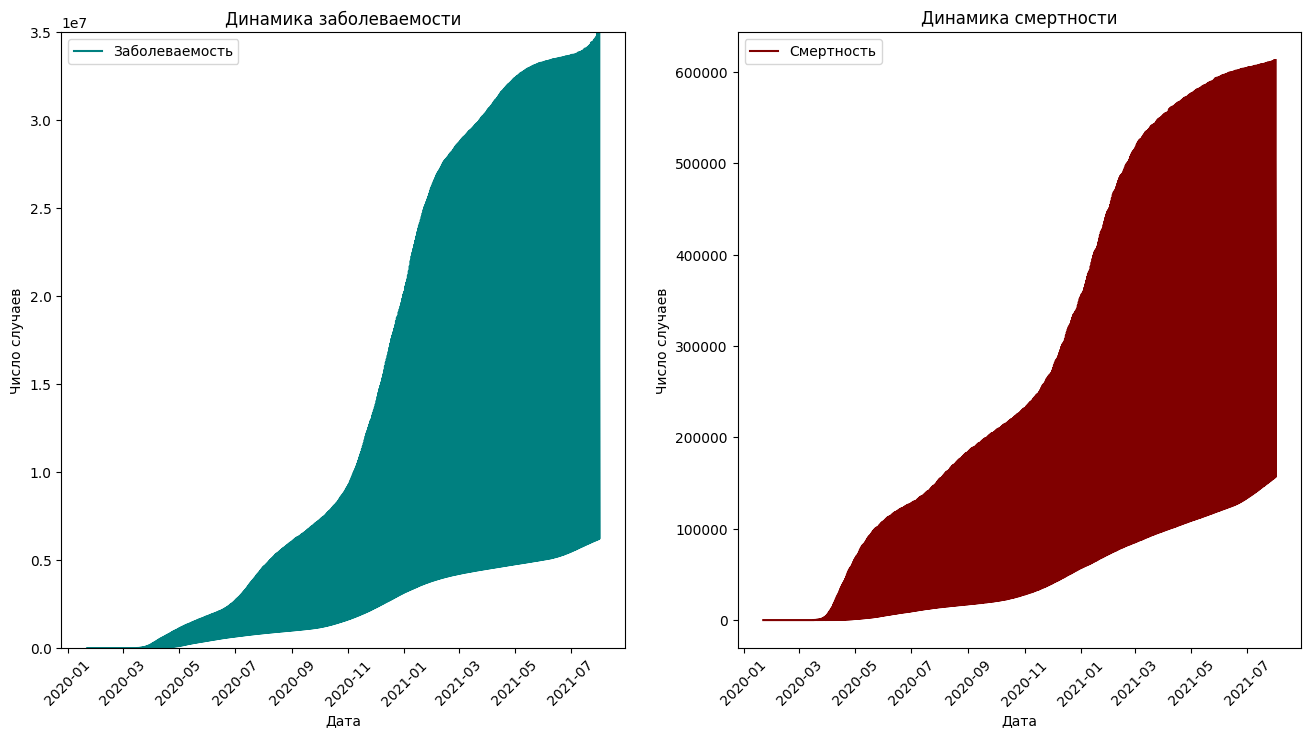

In [131]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(df['date'], df['confirmed'], color='teal', label='Заболеваемость')
plt.title('Динамика заболеваемости')
plt.xlabel('Дата')
plt.ylim(0, 3.500342e+07)
plt.ylabel('Число случаев')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['date'], df['deaths'], color='maroon', label='Смертность')
plt.title('Динамика смертности')
plt.xlabel('Дата')
# plt.ylim(0, 3.500342e+07)
plt.ylabel('Число случаев')
plt.xticks(rotation=45)
plt.legend()

# Показ графика
plt.show()


Графики подтверждают рассчеты, но с разным масштабом (смертей значительно меньше, чем случаев заражения)

2. Визуализируйте динамики заболеваемости и смертности по доступным странам в отдельности, сравните характер распространения	

In [132]:
df_Russia = df[df['country'] == 'Russia']
df_US = df[df['country'] == 'US']

max_confirmed_Russia = df_Russia['confirmed'].max()
max_deaths_Russia = df_Russia['deaths'].max()
max_confirmed_date_Russia = df_Russia.loc[df_Russia['confirmed'].idxmax(), 'date']
max_deaths_date_Russia = df_Russia.loc[df_Russia['deaths'].idxmax(), 'date']

max_confirmed_US = df_US['confirmed'].max()
max_deaths_US = df_US['deaths'].max()
max_confirmed_date_US = df_US.loc[df_US['confirmed'].idxmax(), 'date']
max_deaths_date_US = df_US.loc[df_US['deaths'].idxmax(), 'date']

In [133]:
plt.figure(figsize=(16, 8))

# График для России
plt.subplot(1, 2, 1)
plt.bar(df_Russia['date'], df_Russia['confirmed'], label='Заражения', color='teal')
plt.bar(df_Russia['date'], df_Russia['deaths'], label='Смерти', color='maroon')
# Максимальные значения
plt.text(max_confirmed_date_Russia, max_confirmed_Russia, f'Max: {int(max_confirmed_Russia)}', color='black', ha='center')
plt.text(max_deaths_date_Russia, max_deaths_Russia, f'  Max: {int(max_deaths_Russia)}', color='black', ha='left')
plt.title('Динамика для Russia')
plt.xlabel('Дата')
plt.ylabel('Число случаев')
plt.xticks(rotation=45)
plt.legend()


# График для США
plt.subplot(1, 2, 2)
plt.bar(df_US['date'], df_US['confirmed'], label='Заражения', color='teal')
plt.bar(df_US['date'], df_US['deaths'], label='Смерти', color='maroon')
# Максимальные значения
plt.text(max_confirmed_date_US, max_confirmed_US, f'Max: {int(max_confirmed_US)}', color='black', ha='center')
plt.text(max_deaths_date_US, max_deaths_US, f'  Max: {int(max_deaths_US)}', color='black', ha='left')
plt.title('Динамика для US')
plt.xlabel('Дата')
plt.ylabel('Число случаев')
plt.xticks(rotation=45)
plt.legend()

plt.show()


Характер распространения в США выглядит более агрессивным, с резкими пиками заболеваемости и смертности, в то время как в России динамика более сглаженная.Статистически, ситуация в России гораздо лучше.

### 13	Постройте модель линейной регрессии по смертям от заболеваемости и вычислите прогноз количества смертей в России для 25 000 000 случаев заражений 
(примечание: сформируйте выборку по России, выделите признак и целевую переменную [используем 100% данных для обучения], постройте прогноз смертей для 25 000 000 заболевших [поможет метод predict], сделайте выводы по полученному прогнозу)

In [116]:
X = df_Russia[['confirmed']] # Признак
y = df_Russia['deaths'] # Целевая переменная

model = LinearRegression()
model.fit(X, y)

# Прогноз
predicted_deaths = model.predict([[25000000]])
print(f'Прогнозируемое количество смертей для 25 000 000 случаев заражений: {predicted_deaths[0]:.0f}')


Прогнозируемое количество смертей для 25 000 000 случаев заражений: 582420


/home/irina/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Визуализируем прогноз относительно среднемесячного количества смертей

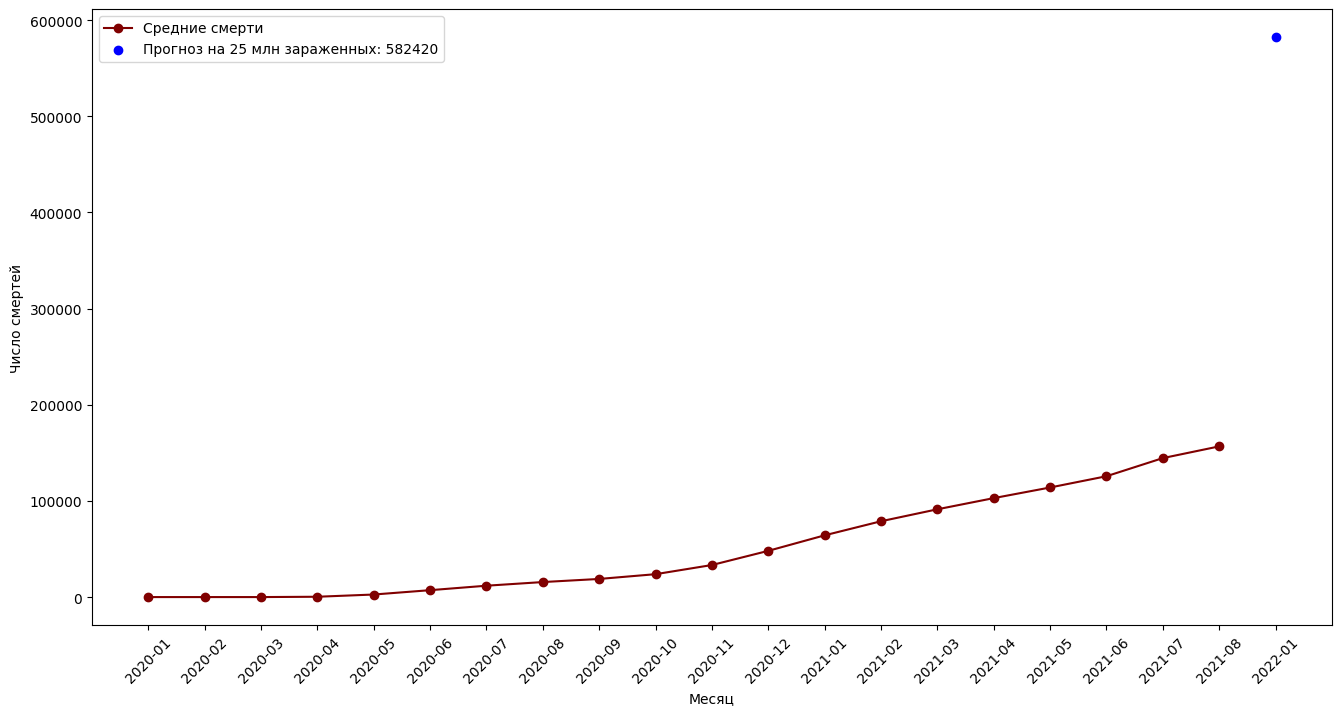

In [120]:
df['month'] = df['date'].dt.to_period('M')
df_Russia = df[df['country'] == 'Russia']

# Группировка по месяцам и рассчет средних значений
monthly_avg = df_Russia.groupby('month')[['confirmed', 'deaths']].mean().reset_index()

plt.figure(figsize=(16, 8))
# Средние по месяцам
plt.plot(monthly_avg['month'].astype(str), monthly_avg['deaths'], marker='o', label='Средние смерти', color='maroon')
# Прогноз
plt.scatter('2022-01', predicted_deaths, color='blue', label=f'Прогноз на 25 млн зараженных: {predicted_deaths[0]:.0f}', zorder=5)
plt.xlabel('Месяц')
plt.ylabel('Число смертей')
plt.xticks(rotation=45)
plt.legend()

plt.show()


Полученный прогноз существенно превышает среднее количество смертей за все месяцы наблюдений. Очень низкая вероятность, что она появится в ближайшие время.

### 14	Дополните шаблон презентации отдельными слайдами с информацией по построению модели, получению прогноза и рекомендациями для бизнеса с учётом полученной информации (создайте разделы: “Построение модели” и “Рекомендации для бизнеса”).